In [1]:
from rljax.algorithm import DQN
from rljax.trainer import Trainer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import Preprocess, OptimalExecutionEnvironment

In [2]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=6)
data = raw.process()

In [6]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 5000
SEED = 0

env = OptimalExecutionEnvironment(
    data,
    risk_weights=(2, 1),
    trade_penalty=100,
    max_purchase=4,
    steps=TWENTY_SECOND_DAY,
    end_units_risk=TWENTY_SECOND_DAY,  # Ideally, this should be `TWENTY_SECOND_DAY//5*2`
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-5,  # Have been messing around with this but doesn't seem to make a big difference
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2500,
    seed=SEED,
)
trainer.train()

Num steps: 2500     Return: -1025364.9   Time: 0:00:40
Num steps: 5000     Return: -1024240.9   Time: 0:01:18


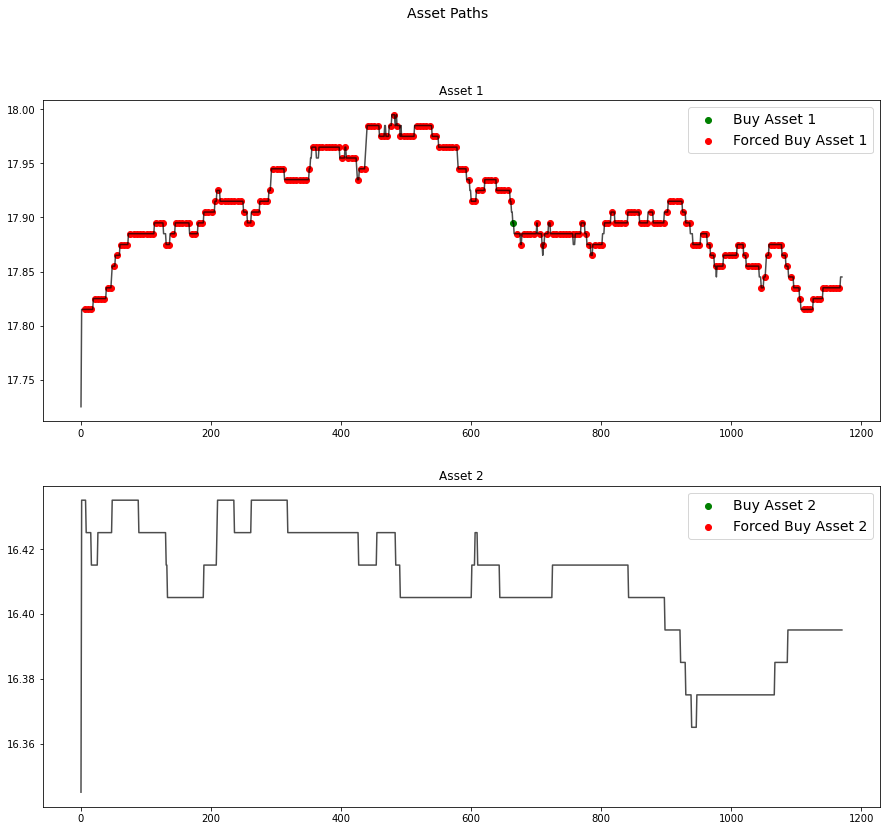

In [7]:
env_test.plot('asset_paths')

In [10]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
df = env_test.portfolios_to_df()
df

,time,cash,shares,prices,total_risk,res_imbalance_state,trade,penalty_trade,trade_asset,trade_shares,trade_risk,trade_price,trade_cost,trade_penalty,risk,next_risk_target,distance_to_next_risk_target,rewards,observations,raw_action,action
0,0,0.000,"(0, 0)","(17.724999999999984, 16.344999999999988)",0,311,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,NaN,NaN,4.0,0.0
1,1,0.000,"(0, 0)","(17.814999999999998, 16.435000000000002)",0,110,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[3, 5]",4.0,0.0
2,2,0.000,"(0, 0)","(17.814999999999998, 16.435000000000002)",0,100,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[2, 5]",4.0,0.0
3,3,0.000,"(0, 0)","(17.814999999999998, 16.435000000000002)",0,100,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[1, 5]",4.0,0.0
4,4,0.000,"(0, 0)","(17.814999999999998, 16.435000000000002)",0,100,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[0, 5]",4.0,0.0
5,5,0.000,"(0, 0)","(17.814999999999998, 16.435000000000002)",0,100,None,None,NaN,NaN,NaN,NaN,NaN,None,5.0,5.0,5.0,"(0, actual)","[4, 5]",4.0,0.0
6,6,-5344.500,"(3, 0)","(17.814999999999998, 16.435000000000002)",6,100,None,"Trade(asset=1, shares=3, risk=6, price=17.8149...",NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(-5291.294999999999, actual)","[3, 10]",4.0,0.0
7,7,-5344.500,"(3, 0)","(17.814999999999998, 16.435000000000002)",6,100,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(0, actual)","[2, 4]",4.0,0.0
8,8,-5344.500,"(3, 0)","(17.814999999999998, 16.425)",6,000,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(0, actual)","[1, 4]",4.0,0.0
9,9,-5344.500,"(3, 0)","(17.814999999999998, 16.425)",6,201,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(0, actual)","[0, 4]",4.0,0.0


In [12]:
s = 0
for i in df['rewards'].fillna(0):
    if i:
        s += i[0]
s

-1028006.8100000002

#### Raw actions input by DQN before they are zero centered

In [ ]:
env_test._raw_actions[-1]

#### Rewards along with a flag for the type of reward

In [ ]:
env_test._rewards[-1]

#### Raw observations seen by DQN

In [ ]:
env_test._observations[-1]

### Raw format for accessing the portfolio history
Should ideally be gotten by `env_test.portfolio_history`

## FOR SOME REASON, THE LENGTH OF THIS IS NOWHERE NEAR WHAT IT SHOULD BE FOR THE BASE TRAINING ENV. I AM GETTING AROUND 17 ENTRIES FOR IT BUT THE ENV_TEST SEEMS TO BE CORRECT

In [ ]:
env_test._portfolios[3][-1]

In [ ]:
env_test.end_units_risk

In [ ]:
env_test._period_risk.get(5, env_test.end_units_risk)

In [ ]:
env_test.end_units_risk - env_test.current_portfolio.total_risk

In [ ]:
env_test.prices_at_start

In [ ]:
# print(env_test.step(2))
# env_test._portfolios[-1][-1]

### Not sure this plot is fully correct, when the shares hit this line perfectly, they fail to hit the risk plot perfectly. This also happens in reverse

In [ ]:
env_test.plot()

### Case and point, shares hit well but risk doesn't

In [ ]:
env_test.plot('risk_history')

### Count number of chosen trades
Can use `len([p.time for p in env_test.portfolio_history[-1] if (p.trade or p.penalty_trade)])` for all trades or `len([p.time for p in env_test.portfolio_history[-1] if (p.penalty_trade)])` for the penalty trades

In [ ]:
len([p.time for p in env_test.portfolio_history[-1] if (p.trade)])

### Changes the `env_test._period_risk` dictionary to have the amount of risk we should have bought instead of the amount of risk remaining

In [ ]:
dict(zip(env_test._period_risk.keys(), env_test.end_units_risk-np.array(list(env_test._period_risk.values()))))

In [ ]:
list(zip(env_test._rewards[-1], env_test.portfolio_history[-1]))

In [ ]:
env_test._observations[-1]

In [ ]:
plt.plot(np.cumsum(env_test._rewards[-1]))

In [ ]:
import numpy as np

In [ ]:
env_test.risk_history[-1]

In [ ]:
set(np.gradient(env_test.risk_history[-1]))

In [ ]:
env_test.portfolio_history

In [ ]:
np.argwhere(env_test.risk_history[-1] > env_test.end_units_risk)